In [71]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

In [72]:
o_status = pd.read_csv('C:/Users/elfek/Desktop/NTT/og/04.order_status.csv', sep=",")
o_item = pd.read_csv('C:/Users/elfek/Desktop/NTT/og/05.order_items.csv', sep = ";")
customers = pd.read_csv('C:/Users/elfek/Desktop/NTT/clean/02.customers_new.csv', encoding='latin-1', sep=",", index_col=0)
o_payments = pd.read_csv('C:/Users/elfek/Desktop/NTT/og/06.order_payments.csv', sep = ";")
p_reviews = pd.read_csv('C:/Users/elfek/Desktop/NTT/og/07.product_reviews.csv', sep = ";")
products = pd.read_csv('C:/Users/elfek/Desktop/NTT/clean/products_new.csv', sep = ",")

In [73]:
o_status = o_status[o_status["order_status"]=="delivered"]

#  create the recommendation dataset

In [74]:
rec = pd.merge(customers, o_status, on ="customer_id")

In [75]:
rec = rec.drop(columns=["order_status","ts_order_purchase","ts_order_approved","ts_order_delivered_carrier","ts_order_delivered_customer","ts_order_estimated_delivery"])

In [76]:
rec = pd.merge(rec, o_item, on ="order_id")

In [77]:
rec = pd.merge(rec, products, on ="product_id")

In [78]:
rec = pd.merge(rec, p_reviews, on=["order_id","product_id"])

In [79]:
#check the duplicates in order_id & product_id ie customers who bought the same product twice in the same order and are recorded twice
rec[rec.duplicated(['order_id', 'product_id', "review_score"])]

,latest_order_purchase,customer_id,customer_unique_id,customer_autonomous_community,customer_city,cac_count,cc_count,order_id,order_item_sequence_id,product_id,price,shipping_cost,seller_id,max_shipping_seller_date,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity,category_new,review_score,review_date
10,2018-07-25 13:54:00,a04fd07fb2796275f40eed69b7c99865,5040991d70fe8053dc6182340d0bfd06,aragon,zaragoza,1,1,7c33b548f0fee23cb4a8afe1f1333ee8,2,372645c7439f9661fbbacfd129aa92ec,"119,90","18,09",da8622b14eb17ae2831f4ac5b9dab84a,31/07/2018 14:05,kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,07/08/2018 02:59
13,2018-07-20 20:58:00,2721900eb4e0f1cc2c836dd7bc1b1e11,5e33331e26d0a4e1f3fe84b3f9c5549b,comunidad de madrid,alcobendas,1,1,dceb62e8fa94b46006c9554fed743df0,2,372645c7439f9661fbbacfd129aa92ec,"119,90","23,42",da8622b14eb17ae2831f4ac5b9dab84a,27/07/2018 11:45,kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,27/07/2018 23:31
15,2019-08-22 15:50:00,c0ba81c65bd30a9c04cd3650c0dbed36,72ff384d757b9a86b989214e8801b21f,comunidad de madrid,madrid,1,1,fb7b22bb2a29860909a25f91510e4292,3,372645c7439f9661fbbacfd129aa92ec,"114,90","13,30",da8622b14eb17ae2831f4ac5b9dab84a,29/08/2019 02:45,kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,4,29/08/2019 00:33
18,2018-11-19 21:16:00,c75bab5761473acd4dab00d2ef0e4775,8bc85b1061383d0dcd4e995a726da763,aragon,huesca,1,1,0f21631dd255a459deaaafb7a98600dd,2,372645c7439f9661fbbacfd129aa92ec,"99,90","17,95",da8622b14eb17ae2831f4ac5b9dab84a,19/06/2018 17:22,kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,26/06/2018 11:24
24,2018-07-07 18:07:00,dc8516f3d9bc99049e72ea4d386bc909,b7a16ae54a2a6515f7756fe9ccae7378,comunidad valenciana,valencia,1,1,ff4118746eaaed0d632211903070df50,2,372645c7439f9661fbbacfd129aa92ec,"99,90","17,95",da8622b14eb17ae2831f4ac5b9dab84a,13/07/2018 18:23,kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,22/07/2018 21:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106980,2019-07-02 16:39:00,ed583a2a1eaf0dedc33af816153e8b8c,fff5eb4918b2bf4b2da476788d42051c,la rioja,calahorra,1,1,cf4659487be50c0c317cff3564c4a840,2,bc3c6d2a621414f2e1df7a8a32a2828e,"175,00","299,16",56e361f411e38dcef17cdc2a3d99628b,10/07/2019 08:32,home security systems,18700.0,36.0,105.0,36.0,3,electronics,4,19/07/2019 12:31
106981,2019-07-02 16:39:00,ed583a2a1eaf0dedc33af816153e8b8c,fff5eb4918b2bf4b2da476788d42051c,la rioja,calahorra,1,1,cf4659487be50c0c317cff3564c4a840,3,bc3c6d2a621414f2e1df7a8a32a2828e,"175,00","299,16",56e361f411e38dcef17cdc2a3d99628b,10/07/2019 08:32,home security systems,18700.0,36.0,105.0,36.0,3,electronics,4,19/07/2019 12:31
106982,2019-07-02 16:39:00,ed583a2a1eaf0dedc33af816153e8b8c,fff5eb4918b2bf4b2da476788d42051c,la rioja,calahorra,1,1,cf4659487be50c0c317cff3564c4a840,4,bc3c6d2a621414f2e1df7a8a32a2828e,"175,00","299,16",56e361f411e38dcef17cdc2a3d99628b,10/07/2019 08:32,home security systems,18700.0,36.0,105.0,36.0,3,electronics,4,19/07/2019 12:31
106983,2019-07-02 16:39:00,ed583a2a1eaf0dedc33af816153e8b8c,fff5eb4918b2bf4b2da476788d42051c,la rioja,calahorra,1,1,cf4659487be50c0c317cff3564c4a840,5,bc3c6d2a621414f2e1df7a8a32a2828e,"175,00","299,16",56e361f411e38dcef17cdc2a3d99628b,10/07/2019 08:32,home security systems,18700.0,36.0,105.0,36.0,3,electronics,4,19/07/2019 12:31


In [80]:
#delete
a = rec.groupby(['order_id', 'product_id']).order_item_sequence_id.transform(max)
rec = rec.loc[rec.order_item_sequence_id == a]

In [81]:
#we now check for duplicates in customer_unique_id & product ID ie customers who bought the same product two different times & same rating
rec[rec.duplicated(['customer_unique_id', 'product_id', "review_score"])]

,latest_order_purchase,customer_id,customer_unique_id,customer_autonomous_community,customer_city,cac_count,cc_count,order_id,order_item_sequence_id,product_id,price,shipping_cost,seller_id,max_shipping_seller_date,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity,category_new,review_score,review_date
721,2019-07-24 16:33:00,513f69cbf70fa1089df98c833bbfd6bc,13bf0b4120921402dff563cda4383ff6,cataluna,barcelona,1,1,1c1d7c04efff33ea9ebb71907b576f50,1,11dcc970f7a5581e1bf777b6da3f7096,"68,90","18,28",06579cb253ecd5a3a12a9e6eb6bf8f47,27/07/2019 16:45,home accessories,1038.0,41.0,22.0,28.0,2,home & kitchen,3,31/07/2019 21:52
843,2018-04-17 10:05:00,ca76dd7efffe773e1e1a0c0c36d16e33,0981a271500799427cdf345e9121e20b,comunidad valenciana,castellon,1,1,a8cf68ff08fc00910fdb589e444e23b4,1,7c1bd920dbdf22470b68bde975dd3ccf,"64,99","16,15",cc419e0650a3c5ba77189a1882b7556a,13/04/2018 13:50,beauty & personal care,200.0,22.0,10.0,18.0,2,beauty & personal care,5,24/04/2018 18:35
913,2018-06-02 21:52:00,d63d75553ce7cd45c85be0d49d28c6e5,5c117c579cb98a9c6c50e1301a349f3a,pais vasco,bilbao,1,1,db4d62e39557516a1ce6145d0c659ae1,1,7c1bd920dbdf22470b68bde975dd3ccf,"59,99","16,89",cc419e0650a3c5ba77189a1882b7556a,09/06/2018 11:55,beauty & personal care,200.0,22.0,10.0,18.0,2,beauty & personal care,4,22/06/2018 20:35
1515,2019-06-27 09:18:00,d61a25bb79ab12320b1c6a873f3eb1ad,6edeeed37ddd3dee7559f358b023ef9b,andalucia,jaen,1,1,334ed4f858d2361daeaf939cd365c42b,1,8b50a72d52d7a91fb19d19fbe069e2f2,"44,99","7,58",9f505651f4a6abe901a56cdc21508025,02/07/2019 02:15,home accessories,250.0,20.0,8.0,13.0,1,home & kitchen,5,30/06/2019 19:58
2446,2019-07-19 17:41:00,df4377ee7e2f8972b24a39ff87cd3a6a,b3a34bbf1a1d11885918ad3ad99083ae,pais vasco,bilbao,1,1,082390c0275d73d20f55fec91903bbd7,2,781afe929e3016a667f5f439afd55fce,"109,90","19,12",08633c14ef2db992c11f840f04fad4cd,15/05/2019 14:58,sport outdoors,400.0,18.0,18.0,18.0,1,sport,5,05/06/2019 02:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102741,2018-08-31 10:28:00,acebd967d532546739f68217c058b29b,d0af5dec42f3bf160195f5bcb704fd01,andalucia,almeria,1,1,742bb86f369fadd10d68946fd903aaed,1,d418ddef3e7017381084956220b00b9d,"11,40","8,27",d91fb3b7d041e83b64a00a3edfb37e4f,06/09/2018 19:55,ceiling fans,100.0,18.0,8.0,13.0,1,home & kitchen,5,18/09/2018 20:54
102901,2019-05-06 17:04:00,92d10040d479c14fdb924ce85bb788c5,d21fb1e8aee69c608f5c2fb5b6c28cad,comunidad de madrid,madrid,1,1,37b680c6aa8ce81441e0e86dcb6d7822,3,839c9cd22f47fc465c20d554b46fed2c,"20,90","15,10",f626e15b7314c267e4429010866f70e9,01/03/2019 09:55,coffee machines,267.0,18.0,13.0,15.0,1,home & kitchen,5,05/03/2019 16:28
103058,2019-02-14 11:52:00,971b5100c36334ff389c9ba8db84c93f,d3882d7abd0c66064d740d7ed04dd1ef,andalucia,malaga,1,1,1a8d422cb8cdae5221a5a8eb371c49cd,1,ba9a847a2c023953743ba9e5ef6c88c6,"40,14","9,34",9674754b5a0cb32b638cec001178f799,21/02/2019 02:55,ceiling fans,200.0,26.0,15.0,35.0,1,home & kitchen,5,23/02/2019 10:58
103987,2019-02-26 12:42:00,9b827375ba57d2e979329d7a5c92685d,dd7b0e9b51e5377bd9c1fd3e286c7b9d,cataluna,barcelona,1,1,2122719f6fc72fba16b0b3001d539a7e,1,a8e7b3f6db5b8a460082c9982f9337c2,"5,99","14,10",1da3aeb70d7989d1e6d9b0e887f97c23,22/01/2019 12:16,sport outdoors,125.0,16.0,7.0,14.0,1,sport,5,07/02/2019 18:39


In [82]:
#delete
b = rec.groupby(['customer_unique_id', 'product_id']).review_date.transform(max)
rec = rec.loc[rec.review_date == b]

In [83]:
#how many duplicates
rec.duplicated().sum()

7

In [84]:
#drop them
rec = rec.drop_duplicates()

In [85]:
#drop useless columns 
list(rec.columns)

['latest_order_purchase',
 'customer_id',
 'customer_unique_id',
 'customer_autonomous_community',
 'customer_city',
 'cac_count',
 'cc_count',
 'order_id',
 'order_item_sequence_id',
 'product_id',
 'price',
 'shipping_cost',
 'seller_id',
 'max_shipping_seller_date',
 'product_category_name',
 'product_weight_gr',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_photo_quantity',
 'category_new',
 'review_score',
 'review_date']

In [86]:
rec = rec.drop(columns=['customer_id',
 'customer_autonomous_community',
 'customer_city',
 'order_id',
 'order_item_sequence_id',
 'seller_id',
 'max_shipping_seller_date', 'cac_count','cc_count'])

In [87]:
rec

,latest_order_purchase,customer_unique_id,product_id,price,shipping_cost,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity,category_new,review_score,review_date
0,2019-05-10 10:56:00,0000366f3b9a7992bf8c76cfdf3221e2,372645c7439f9661fbbacfd129aa92ec,"129,90","12,00",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,1,21/05/2019 13:44
1,2018-05-24 16:04:00,0f520a55a204a95018cd59a31e7d000a,372645c7439f9661fbbacfd129aa92ec,"99,90","13,72",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,30/05/2018 23:48
2,2018-03-13 19:10:00,1244ae3cc3aad7447c1fc36cea194020,372645c7439f9661fbbacfd129aa92ec,"89,90","17,37",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,4,07/04/2018 01:17
3,2019-04-21 14:12:00,1741b0bef7ccbc530ba7287000d5f49f,372645c7439f9661fbbacfd129aa92ec,"114,90","21,04",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,04/05/2019 11:18
4,2018-09-10 20:15:00,1d37df739a7cdbd28609dc2954cc2c75,372645c7439f9661fbbacfd129aa92ec,"119,90","18,09",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,24/09/2018 13:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106974,2019-04-25 12:08:00,ffecceca389973ef16660d58696f281e,94bedc3b89ef3b2dd091735569780a0d,"59,90","12,86",underwear,200.0,42.0,4.0,14.0,1,clothing & accessories,4,04/05/2019 20:19
106975,2018-03-30 14:50:00,ffedff0547d809c90c05c2691c51f9b7,89cbc14f2460e2001f74f8e667194eb7,"17,90","14,52",home accessories,225.0,18.0,16.0,46.0,1,home & kitchen,3,18/04/2018 13:29
106978,2019-06-26 11:01:00,fff22793223fe80c97a8fd02ac5c6295,165fb50db4fca5b20adf857e6292b171,"22,00","7,73",fragrance,200.0,16.0,9.0,11.0,1,beauty & personal care,5,01/07/2019 18:23
106984,2019-07-02 16:39:00,fff5eb4918b2bf4b2da476788d42051c,bc3c6d2a621414f2e1df7a8a32a2828e,"175,00","299,16",home security systems,18700.0,36.0,105.0,36.0,3,electronics,4,19/07/2019 12:31


# Recommender System

In [88]:
import surprise

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

In [95]:
rec.to_csv('recommendation_data.csv')

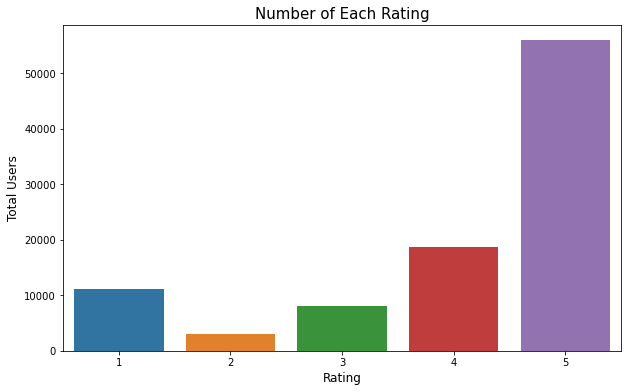

In [90]:
#we plot ratings
plt.figure(figsize=(10,6))
sns.countplot(x='review_score', data=rec)
plt.xlabel("Rating", fontsize =12)
plt.ylabel("Total Users", fontsize =12)
plt.title("Number of Each Rating", fontsize =15)
plt.show()

In [91]:
#the distribution of the number of ratings and mean ratings recorded for each product
rec_grp = pd.DataFrame({"Number of Rating":rec.groupby("product_id").count()['review_score'], 
"Mean Rating":rec.groupby("product_id").mean()["review_score"]})

rec_grp = rec_grp.sort_values("Number of Rating",ascending=False)
rec_grp.head()

,Number of Rating,Mean Rating
product_id,,
99a4788cb24856965c36a24e339b6058,448,4.064732
aca2eb7d00ea1a7b8ebd4e68314663af,422,4.011848
422879e10f46682990de24d770e7f83d,348,4.172414
d1c427060a0f73f6b889a5c7c61f2ac4,310,4.203226
389d119b48cf3043d311335e499d9c6b,307,4.094463


In [92]:
rec[rec['product_id'] == '99a4788cb24856965c36a24e339b6058'].product_category_name.unique()

array(['kitchen & dining'], dtype=object)

array([[<AxesSubplot:title={'center':'Number of Rating'}>,
        <AxesSubplot:title={'center':'Mean Rating'}>]], dtype=object)

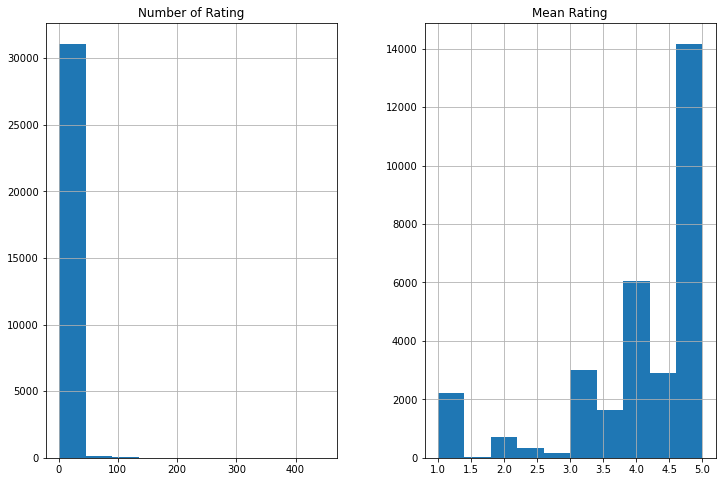

In [93]:
#plot the results
plt.rcParams["figure.figsize"] = (12,8)
rec_grp.hist()

 most of the ratings are between 0 and 100, and most of the products have a mean rating of 5

# SVD

We SVD to build our recommender system. We use the Surprise library; is a Python scikit for building and analyzing recommender systems that deals with rating information. Here we utilize the Surprise library that uses amazingly effective algorithms like Singular Value Decomposition (SVD) to minimize Root Mean Square Error (RMSE) that is measured by K fold Cross Validation and give great recommendations.
It is a well known strategy in linear algebra for matrix factorization in machine learning. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings

In [23]:
from surprise import accuracy
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
reader = Reader()

In [24]:
list(rec)

['latest_order_purchase',
 'customer_unique_id',
 'product_id',
 'price',
 'shipping_cost',
 'product_category_name',
 'product_weight_gr',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_photo_quantity',
 'category_new',
 'review_score',
 'review_date']

In [25]:
rec

,latest_order_purchase,customer_unique_id,product_id,price,shipping_cost,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity,category_new,review_score,review_date
0,2019-05-10 10:56:00,0000366f3b9a7992bf8c76cfdf3221e2,372645c7439f9661fbbacfd129aa92ec,"129,90","12,00",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,1,21/05/2019 13:44
1,2018-05-24 16:04:00,0f520a55a204a95018cd59a31e7d000a,372645c7439f9661fbbacfd129aa92ec,"99,90","13,72",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,30/05/2018 23:48
2,2018-03-13 19:10:00,1244ae3cc3aad7447c1fc36cea194020,372645c7439f9661fbbacfd129aa92ec,"89,90","17,37",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,4,07/04/2018 01:17
3,2019-04-21 14:12:00,1741b0bef7ccbc530ba7287000d5f49f,372645c7439f9661fbbacfd129aa92ec,"114,90","21,04",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,04/05/2019 11:18
4,2018-09-10 20:15:00,1d37df739a7cdbd28609dc2954cc2c75,372645c7439f9661fbbacfd129aa92ec,"119,90","18,09",kitchen & dining,1500.0,34.0,7.0,32.0,1,home & kitchen,5,24/09/2018 13:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106974,2019-04-25 12:08:00,ffecceca389973ef16660d58696f281e,94bedc3b89ef3b2dd091735569780a0d,"59,90","12,86",underwear,200.0,42.0,4.0,14.0,1,clothing & accessories,4,04/05/2019 20:19
106975,2018-03-30 14:50:00,ffedff0547d809c90c05c2691c51f9b7,89cbc14f2460e2001f74f8e667194eb7,"17,90","14,52",home accessories,225.0,18.0,16.0,46.0,1,home & kitchen,3,18/04/2018 13:29
106978,2019-06-26 11:01:00,fff22793223fe80c97a8fd02ac5c6295,165fb50db4fca5b20adf857e6292b171,"22,00","7,73",fragrance,200.0,16.0,9.0,11.0,1,beauty & personal care,5,01/07/2019 18:23
106984,2019-07-02 16:39:00,fff5eb4918b2bf4b2da476788d42051c,bc3c6d2a621414f2e1df7a8a32a2828e,"175,00","299,16",home security systems,18700.0,36.0,105.0,36.0,3,electronics,4,19/07/2019 12:31


In [26]:
df = rec
df = df.drop(columns=['price',
 'shipping_cost',
 'product_category_name',
 'product_weight_gr',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_photo_quantity',
 'review_date'])

In [27]:
# Look for the users who reviewed at least 2 products
usercount = df[["product_id","customer_unique_id"]].groupby("customer_unique_id").count()
usercount = usercount[usercount["product_id"] >= 2]
print(usercount)

                                  product_id
customer_unique_id                          
00053a61a98854899e70ed204dd4bafe           2
000de6019bb59f34c099a907c151d855           2
001926cef41060fae572e2e7b30bd2a4           2
001928b561575b2821c92254a2327d06           2
0025795df7a7d077c4c90162fa820085           2
...                                      ...
ffb973f2bb1c0cb807a99341a9b20dcd           2
ffd6f65402f2bc47238ecd2bdc93e0d4           2
ffe254cc039740e17dd15a5305035928           2
fff7219c86179ca6441b8f37823ba3d3           2
fffcf5a5ff07b0908bd4e2dbc735a684           2

[5121 rows x 1 columns]


In [28]:
# Look for the products who were reviewed by at least 5 users
prodcount =  df[["product_id","customer_unique_id"]].groupby("product_id").count()
prodcount = prodcount[prodcount["customer_unique_id"] >= 5]
print(prodcount)

                                  customer_unique_id
product_id                                          
001795ec6f1b187d37335e1c4704762e                   7
001b72dfd63e9833e8c02742adf472e3                  11
00210e41887c2a8ef9f791ebc780cc36                   5
002159fe700ed3521f46cfcf6e941c76                   6
00250175f79f584c14ab5cecd80553cd                   7
...                                              ...
ffb97eb64c6fe1baada2410288c04457                   8
ffc0b406806006602c5853b00ab5f7fd                   6
ffc9caf33e2d1e9f44e3e06da19085f7                  25
ffd4bf4306745865e5692f69bd237893                   8
fffdb2d0ec8d6a61f0a0a0db3f25b441                   5

[3985 rows x 1 columns]


In [29]:
# Keep only those products and  users
df = df[df["customer_unique_id"].isin(usercount.index) & df["product_id"].isin(prodcount.index)]
df.head()

,latest_order_purchase,customer_unique_id,product_id,category_new,review_score
3,2019-04-21 14:12:00,1741b0bef7ccbc530ba7287000d5f49f,372645c7439f9661fbbacfd129aa92ec,home & kitchen,5
11,2018-06-16 13:45:00,59f65444dd66028dcc0cf4d88bef9a07,372645c7439f9661fbbacfd129aa92ec,home & kitchen,4
13,2018-07-20 20:58:00,5e33331e26d0a4e1f3fe84b3f9c5549b,372645c7439f9661fbbacfd129aa92ec,home & kitchen,5
15,2019-08-22 15:50:00,72ff384d757b9a86b989214e8801b21f,372645c7439f9661fbbacfd129aa92ec,home & kitchen,4
18,2018-11-19 21:16:00,8bc85b1061383d0dcd4e995a726da763,372645c7439f9661fbbacfd129aa92ec,home & kitchen,5


In [30]:
#convert to matric

reviewmatrix = df.pivot_table(index="customer_unique_id", columns="product_id", values="review_score").fillna(0)
reviewmatrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,007c63ae4b346920756b5adcad8095de,008cff0e5792219fae03e570f980b330,00905d58c87afcbce21420b3712cacaa,009af1277432f1a05742df69cdf72d1e,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,00faa46f36261af8bbf3a4d37fa4841b,0105b5323d24fc655f73052694dbbb3a,0129d1e9b29d3fe6833cc922374cd252,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,015e04445dedbd5da301ef29cbb03f83,016711f78a6a87696645db0a6a834826,016cae136d358dcdacbd7ac9f1864c09,017692475c1c954ff597feda05131d73,01cf7c4cffff8db0a1cbe612bd2d50a4,01ef0716b68c8493434ad32430c24e18,01ff1ff8aa5dec93e9938b989393a4ca,020a80cb704bf65f38761fcedf2af192,...,fcaab5d7f656094e49fbe4ee3a506658,fcdb929c70287379ce31deed3f733d72,fcf28afb1353f2f12ea041dd74954226,fd0c762860528d119344e1377b574fc5,fd28b464cf1660a67606f7b48c8c38c6,fd424396761d9e1609c5516b7d8ce17b,fd76f22bf3648e0dd4295e593def7664,fde90f06296b26995fd0de6f16610d70,fe01b643060a6446e59f58e3021e66b3,fe077ec80df6b4ee60bb4498d5ab1962,fe59a1e006df3ac42bf0ceb876d70969,fe61253e50ad6ee9f1d180da22ce5eef,fe6a9515d655fa7936b8a7c841039f34,fe75529a267b76ac6e96f0c322a899a4,fe95eb948375116da759c8ef60295001,fe9dfbe7f974621789683b7b78be2a16,fec565c4e3ad965c73fb1a21bb809257,fecf6223a3494f35362f670e571d2a04,fef7934cc233ee5b1dc13094d98a1465,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff55834c0b3272853dfe62340f2bb91b,ff7c7524d5f9a8386ab27088ec03c1fb,ffc0b406806006602c5853b00ab5f7fd,ffd4bf4306745865e5692f69bd237893
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000de6019bb59f34c099a907c151d855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001926cef41060fae572e2e7b30bd2a4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0025795df7a7d077c4c90162fa820085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002ae492472e45ad6ebeb7a625409392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


the result is a matrix of 3624 rows and 2225 columns 


In [31]:
#we apply SVD
from numpy.linalg import svd
matrix = reviewmatrix.values
u, s, vh = svd(matrix, full_matrices=False)

By default, the svd() returns a full singular value decomposition. We choose a reduced version so we can use smaller matrices to save memory. The columns of vh correspond to the products. We can based on vector space model find which products are most similar to the one we are looking at

highest_similarity = -np.inf
highest_sim_col = -1
for col in range(1,vh.shape[1]):
    similarity = cosine_similarity(vh[:,0], vh[:,col])
    if similarity > highest_similarity:
        highest_similarity = similarity
        highest_sim_col = col
 
print("Column %d (product id %s) is most similar to column 0 (product id %s)" %
        (highest_sim_col, reviewmatrix.columns[col], reviewmatrix.columns[0])
)

In [70]:
# Find the highest similarity
def cosine_similarity(v,u):
    return (v @ u)/ (np.linalg.norm(v) * np.linalg.norm(u))
 
highest_similarity = -np.inf
highest_sim_col = -1
for col in range(1,vh.shape[1]):
    similarity = cosine_similarity(vh[:,0], vh[:,col])
    if similarity > highest_similarity:
        highest_similarity = similarity
        highest_sim_col = col
 
print("Column %d (item id %s) is most similar to column 0 (item id %s)" %
        (highest_sim_col, reviewmatrix.columns[col], reviewmatrix.columns[0]))


Column 1 (item id ffd4bf4306745865e5692f69bd237893) is most similar to column 0 (item id 001b72dfd63e9833e8c02742adf472e3)


In [55]:
rec[rec["product_id"]=="ffd4bf4306745865e5692f69bd237893"].product_category_name.unique() , rec[rec["product_id"]=="00210e41887c2a8ef9f791ebc780cc36"].product_category_name.unique()

(array(['fashion & shoes'], dtype=object),
 array(['beauty & personal care'], dtype=object))

In [53]:
rec[rec["product_id"]=="ffd4bf4306745865e5692f69bd237893"].product_category_name.unique() , rec[rec["product_id"]=="00210e41887c2a8ef9f791ebc780cc36"].product_category_name.unique()

(array(['fashion & shoes'], dtype=object),
 array(['beauty & personal care'], dtype=object))

In [54]:
rec[rec["product_id"]=="ffd4bf4306745865e5692f69bd237893"].product_category_name.unique() , rec[rec["product_id"]=="00250175f79f584c14ab5cecd80553cd"].product_category_name.unique()

(array(['fashion & shoes'], dtype=object),
 array(['home accessories'], dtype=object))

---